In [1]:
import torch
import torch.nn as nn


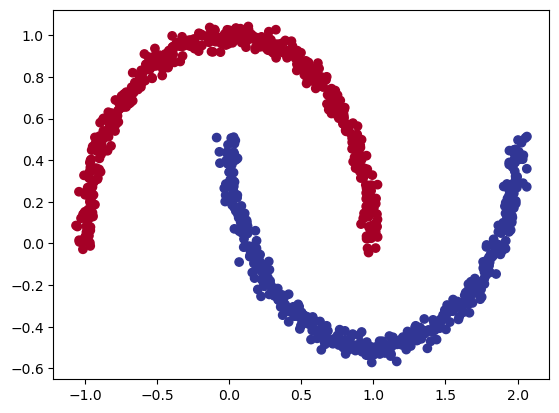

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.03, random_state=42)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [3]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [4]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
class Moons(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(2, 10)
        self.linear2 = nn.Linear(10, 16)
        self.linear3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        return x
    
model = Moons().to(device)
model


Moons(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)

In [6]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [7]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [8]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss:{loss:.5f}, Acc: {acc:.2f}, Test Loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}')

Epoch: 0, Loss:0.69848, Acc: 33.00, Test Loss: 0.69585, Test_acc: 49.50
Epoch: 100, Loss:0.33611, Acc: 84.75, Test Loss: 0.35123, Test_acc: 84.00
Epoch: 200, Loss:0.24811, Acc: 87.88, Test Loss: 0.25240, Test_acc: 88.50
Epoch: 300, Loss:0.22921, Acc: 89.12, Test Loss: 0.23165, Test_acc: 89.50
Epoch: 400, Loss:0.21768, Acc: 90.12, Test Loss: 0.22148, Test_acc: 90.00
Epoch: 500, Loss:0.20637, Acc: 90.25, Test Loss: 0.21160, Test_acc: 90.00
Epoch: 600, Loss:0.19430, Acc: 91.50, Test Loss: 0.20041, Test_acc: 90.00
Epoch: 700, Loss:0.17630, Acc: 92.12, Test Loss: 0.18181, Test_acc: 90.50
Epoch: 800, Loss:0.14645, Acc: 93.12, Test Loss: 0.14949, Test_acc: 93.50
Epoch: 900, Loss:0.10622, Acc: 95.38, Test Loss: 0.10576, Test_acc: 96.50


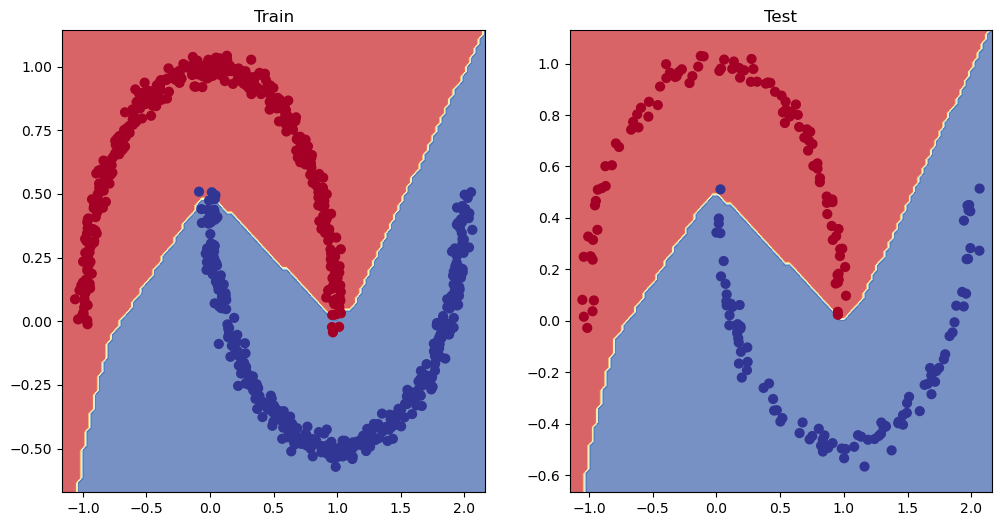

In [9]:
from helper_functions import plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test) # model_3 = has non-linearity

In [10]:

import numpy as np

def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [11]:
tens = torch.arange(-1, 1, 0.1)
tens

tensor([-1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01])

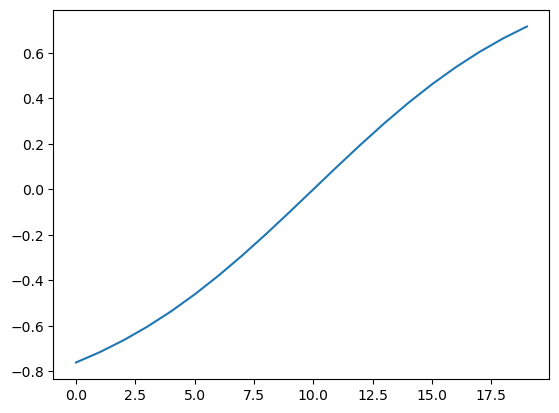

In [12]:
plt.plot(tanh(tens))

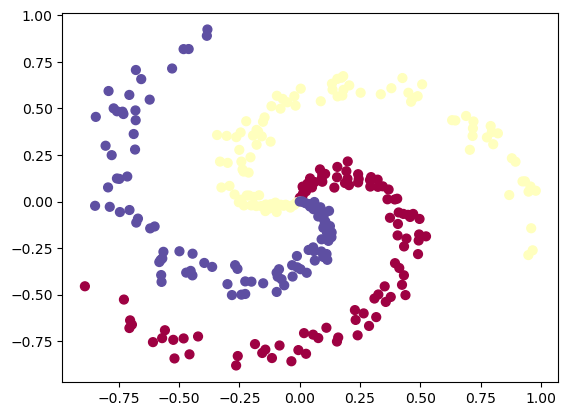

In [37]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [38]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)
type(X)

torch.Tensor

In [39]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [40]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [41]:
# Build model with non-linear activation function
from torch import nn
class Spiral(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=32)
        self.layer_3 = nn.Linear(in_features=32, out_features=10)
        self.layer_4 = nn.Linear(in_features=10, out_features=3)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model 
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))

model = Spiral().to(device)
print(model)

Spiral(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)


In [42]:
# Setup loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.03)

In [43]:
from torchmetrics import Accuracy

accuracy_fn = Accuracy(task="multiclass", num_classes=3).to(device=device)

In [44]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, Loss:{loss:.5f}, Acc: {acc:.2f}, Test Loss: {test_loss:.5f}, Test_acc: {test_acc:.2f}')
        #print(f'Epoch: {epoch}, Loss:{loss:.5f}, Test Loss: {test_loss:.5f}')    

Epoch: 0, Loss:1.10536, Acc: 0.34, Test Loss: 1.07451, Test_acc: 0.52
Epoch: 100, Loss:0.02070, Acc: 0.99, Test Loss: 0.00080, Test_acc: 1.00
Epoch: 200, Loss:0.01756, Acc: 0.99, Test Loss: 0.00010, Test_acc: 1.00
Epoch: 300, Loss:0.01521, Acc: 0.99, Test Loss: 0.00003, Test_acc: 1.00
Epoch: 400, Loss:0.01453, Acc: 0.99, Test Loss: 0.00003, Test_acc: 1.00
Epoch: 500, Loss:0.01454, Acc: 0.99, Test Loss: 0.00004, Test_acc: 1.00
Epoch: 600, Loss:0.01455, Acc: 0.99, Test Loss: 0.00001, Test_acc: 1.00
Epoch: 700, Loss:0.01444, Acc: 0.99, Test Loss: 0.00001, Test_acc: 1.00
Epoch: 800, Loss:0.01452, Acc: 0.99, Test Loss: 0.00001, Test_acc: 1.00
Epoch: 900, Loss:0.01421, Acc: 0.99, Test Loss: 0.00001, Test_acc: 1.00


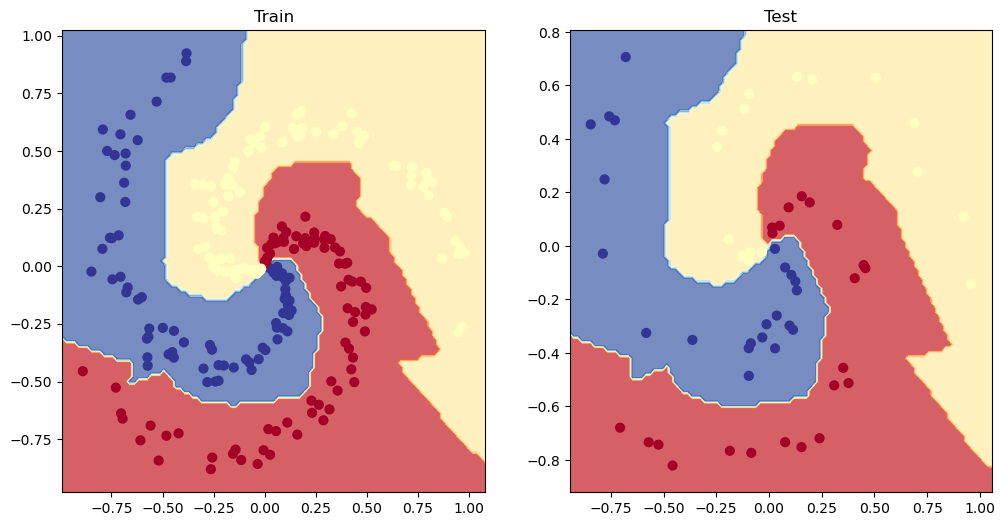

In [45]:
from helper_functions import plot_decision_boundary

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test) # model_3 = has non-linearity